# Liver Disease Prediction 

## Importing libraries 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

# to split train and test set
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# import color maps
from matplotlib.colors import ListedColormap
sns.set()
plt.style.use('ggplot')

## Getting the dataset 

In [29]:
data = pd.read_csv('Liver disease.csv')

In [30]:
data.shape

(583, 11)

In [31]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [32]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## EDA and Data Visualisation 

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [34]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [35]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [36]:
#filtering categorical data
data.dtypes[data.dtypes=='object']

Gender    object
dtype: object

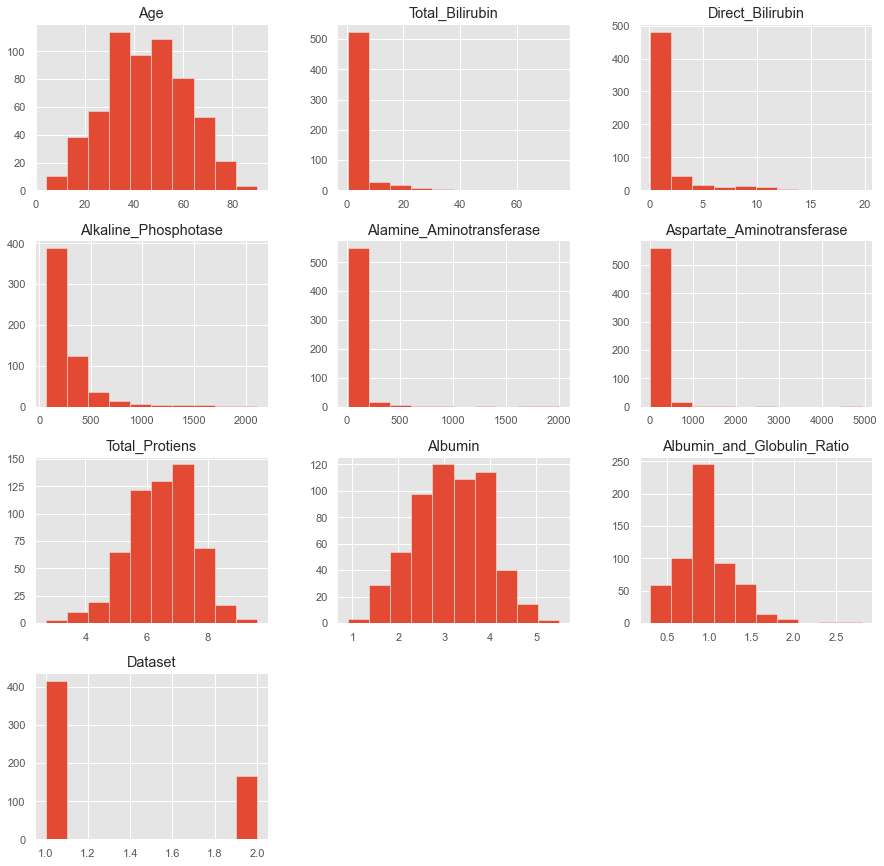

In [37]:
#distribution of numerical features
data.hist(figsize=(15,15), xrot=0, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


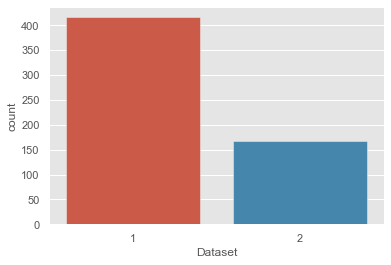

In [38]:
# Plotting the Number of patients with liver disease vs Number of patients with no liver disease
sns.countplot(data=data, x = 'Dataset', label='Count')

LD, NLD = data['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

In [39]:
#output value has '1' for liver disease and '2' for no liver disease
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1

data['Dataset'] = data['Dataset'].map(partition)

In [40]:
#distribution of categorical data
data.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


Number of male patients:  441
Number of female patients:  142


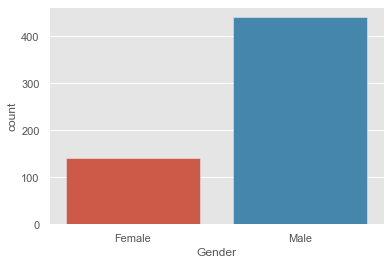

In [41]:
# Plotting the Number of Male and Female patients
sns.countplot(data=data, x = 'Gender', label='Count')

M, F = data['Gender'].value_counts()
print('Number of male patients: ',M)
print('Number of female patients: ',F)

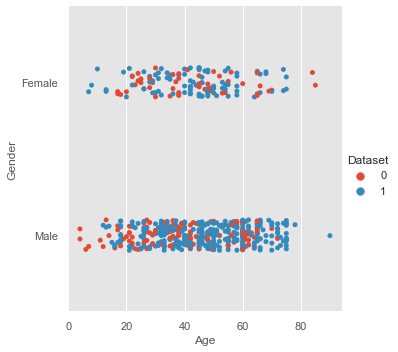

In [42]:
# Plotting patient Age vs Gender
sns.catplot(x="Age", y="Gender", hue="Dataset", data=data)

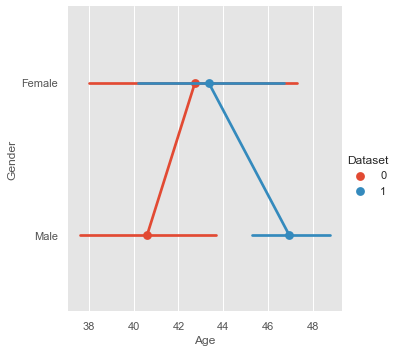

In [43]:
sns.factorplot (x="Age", y="Gender", hue="Dataset", data=data);

In [44]:
#more male patients than female
def partition(x):
    if x =='Male':
        return 0
    return 1

data['Gender'] = data['Gender'].map(partition)

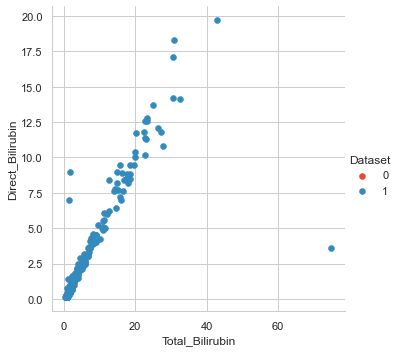

In [46]:
#Total Bilirubin and Direct Bilirubin
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

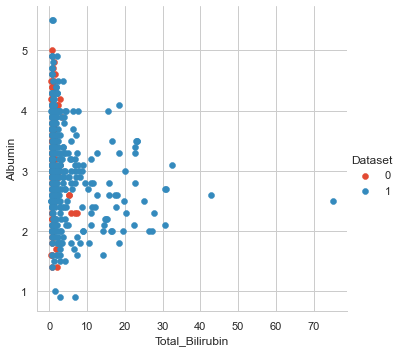

In [47]:
#Total Bilirubin and Albumin
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

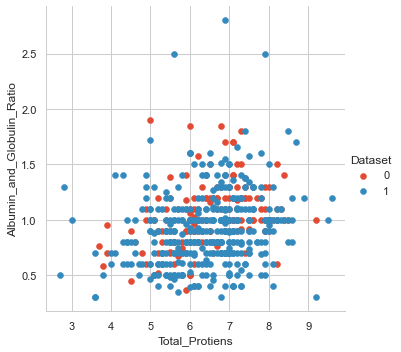

In [48]:
#Total proteins and Albumin and Globulin Ratio
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Protiens', 'Albumin_and_Globulin_Ratio').add_legend()

In [50]:
data.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<AxesSubplot:>

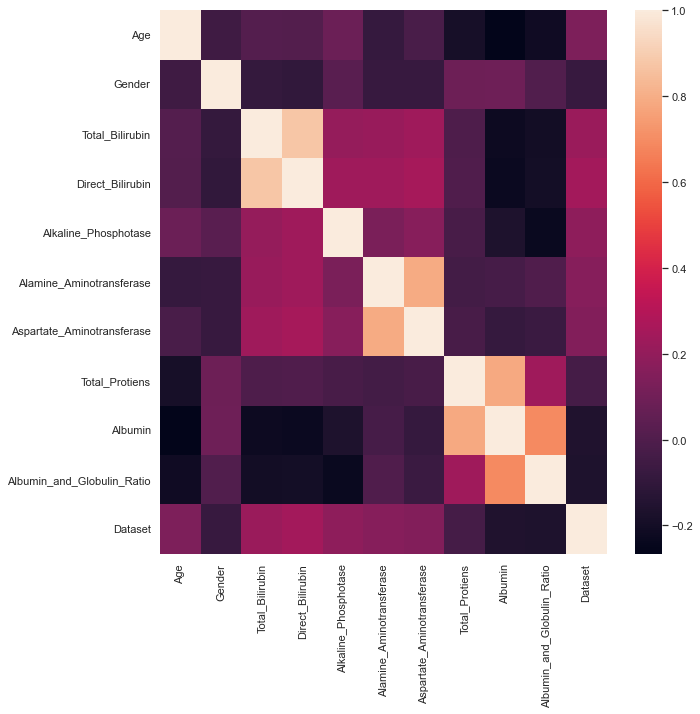

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

## Data Cleaning 

In [53]:
data = data.drop_duplicates()
data.shape

(570, 11)

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

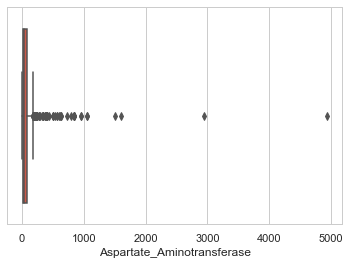

In [54]:
#removing outliers
sns.boxplot(data.Aspartate_Aminotransferase)

In [55]:
data = data[data.Aspartate_Aminotransferase <=3000 ]
data.shape

(569, 11)

In [56]:
data = data[data.Aspartate_Aminotransferase <= 2500 ]
data.shape

(568, 11)

In [59]:
data.isnull().values.any()

True

In [60]:
data = data.dropna(how='any')

In [62]:
data.shape

(564, 11)

## Data Preparation 

In [64]:
#for target variable
Y = data.Dataset

#for input features
X = data.drop('Dataset', axis=1)

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=data.Dataset)

In [69]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(394, 10) (170, 10) (394,) (170,)


## Data Standardization 

In [70]:
train_mean = X_train.mean()
train_std = X_train.std()

In [71]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [72]:
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02
mean,-1.014417e-16,-3.268677e-17,3.071429e-16,-9.008586e-16,-9.228377e-17,3.155964e-17,2.254260e-18,-1.348047e-15,-3.231200e-15,-7.908226e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.609772e+00,-5.473278e-01,-4.570968e-01,-4.967282e-01,-9.478507e-01,-3.999413e-01,-4.728145e-01,-3.285639e+00,-2.750957e+00,-2.057111e+00
25%,-7.944028e-01,-5.473278e-01,-3.969294e-01,-4.623568e-01,-4.750931e-01,-3.207875e-01,-3.922670e-01,-7.312226e-01,-7.405196e-01,-7.644963e-01
50%,1.938343e-02,-5.473278e-01,-3.668457e-01,-4.279853e-01,-3.294669e-01,-2.477225e-01,-3.059663e-01,-1.389277e-03,-1.122579e-01,7.570326e-02
75%,7.705707e-01,-5.473278e-01,-1.111341e-01,-8.427106e-02,4.409605e-02,-9.702594e-02,-7.583080e-02,6.372149e-01,7.673084e-01,5.281184e-01
max,2.460742e+00,1.822421e+00,1.076413e+01,6.240071e+00,7.692639e+00,9.768272e+00,8.669316e+00,2.826715e+00,2.400789e+00,5.052270e+00


In [73]:
X_test = (X_test - train_mean) / train_std

In [74]:
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,-0.169886,0.107838,-0.065212,-0.062637,0.052364,-0.020612,0.059915,0.284104,0.238829,0.124366
std,1.053615,1.063007,0.800553,0.912979,1.097240,0.818079,0.976194,0.950912,0.985593,1.100236
min,-2.484574,-0.547328,-0.442055,-0.496728,-0.833882,-0.393853,-0.478568,-3.376868,-2.750957,-2.057111
25%,-0.857002,-0.547328,-0.396929,-0.462357,-0.457154,-0.320788,-0.386514,-0.275077,-0.363563,-0.489816
50%,-0.074515,-0.547328,-0.381888,-0.427985,-0.346351,-0.247723,-0.294459,0.454757,0.264699,-0.118189
75%,0.582774,1.822421,-0.216427,-0.170200,0.044096,-0.090937,-0.006790,0.819673,1.018613,0.770484
max,2.773737,1.822421,3.649330,3.868443,6.173061,7.150109,5.504954,2.917944,3.029050,6.021731


## Model Building 

### 1) Logistic Regression 

In [75]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [76]:
Y_pred = log_reg.predict(X_test)

In [77]:
print(accuracy_score(Y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(Y_test, log_reg.predict(X_test))
print(log_reg_acc)

0.7208121827411168
0.6941176470588235


In [78]:
# confusion matrix

print(confusion_matrix(Y_test, Y_pred))

[[ 14  35]
 [ 17 104]]


In [79]:
# classification report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.45      0.29      0.35        49
           1       0.75      0.86      0.80       121

    accuracy                           0.69       170
   macro avg       0.60      0.57      0.58       170
weighted avg       0.66      0.69      0.67       170



### 2) KNN classifier 

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [82]:
Y_pred = knn.predict(X_test)

In [83]:
print(accuracy_score(Y_train, knn.predict(X_train)))

knn_acc = accuracy_score(Y_test, knn.predict(X_test))
print(knn_acc)

0.7944162436548223
0.6294117647058823


In [85]:
print(confusion_matrix(Y_test, Y_pred))

[[19 30]
 [33 88]]


In [87]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.37      0.39      0.38        49
           1       0.75      0.73      0.74       121

    accuracy                           0.63       170
   macro avg       0.56      0.56      0.56       170
weighted avg       0.64      0.63      0.63       170



### 3) SVM 

In [88]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(probability=True)
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [89]:
# best parameters

grid_search.best_params_

{'C': 0.01, 'gamma': 0.0001}

In [90]:
# best score 

grid_search.best_score_

0.7132099967543006

In [92]:
svc = SVC(C = 0.01, gamma = 0.0001, probability=True)
svc.fit(X_train, Y_train)

SVC(C=0.01, gamma=0.0001, probability=True)

In [93]:
Y_pred = svc.predict(X_test)

In [94]:
print(accuracy_score(Y_train, svc.predict(X_train)))

svc_acc = accuracy_score(Y_test, svc.predict(X_test))
print(svc_acc)

0.7131979695431472
0.711764705882353


In [95]:
print(confusion_matrix(Y_test, Y_pred))

[[  0  49]
 [  0 121]]


In [97]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.71      1.00      0.83       121

    accuracy                           0.71       170
   macro avg       0.36      0.50      0.42       170
weighted avg       0.51      0.71      0.59       170



### 4) Gaussian Naive Bayes 

In [99]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

GaussianNB()

In [100]:
# Predict Output
gauss_predicted = gaussian.predict(X_test)

In [101]:
print(accuracy_score(Y_train, gaussian.predict(X_train)))

gauss_acc = accuracy_score(Y_test, gaussian.predict(X_test))
print(gauss_acc)

0.5939086294416244
0.5529411764705883


In [102]:
print(confusion_matrix(Y_test,Y_pred))

[[  0  49]
 [  0 121]]


In [103]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.71      1.00      0.83       121

    accuracy                           0.71       170
   macro avg       0.36      0.50      0.42       170
weighted avg       0.51      0.71      0.59       170



### 5) Random Forest 

In [105]:
ran_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 16, max_features = 'auto', min_samples_leaf = 4, min_samples_split = 2, n_estimators = 130)
ran_clf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_leaf=4,
                       n_estimators=130)

In [107]:
Y_pred = ran_clf.predict(X_test)

In [108]:
print(accuracy_score(Y_train, ran_clf.predict(X_train)))

ran_clf_acc = accuracy_score(Y_test, Y_pred)
print(ran_clf_acc)

0.9365482233502538
0.7


In [109]:
print(confusion_matrix(Y_test, Y_pred))

[[ 19  30]
 [ 21 100]]


In [110]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.47      0.39      0.43        49
           1       0.77      0.83      0.80       121

    accuracy                           0.70       170
   macro avg       0.62      0.61      0.61       170
weighted avg       0.68      0.70      0.69       170



### Model Comparison 

In [111]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Gaussian Naive Bayes', 'Random Forest Classifier'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(gauss_acc,4), 100*round(ran_clf_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVM,71.18
4,Random Forest Classifier,70.00
0,Logistic Regression,69.41
1,KNN,62.94
3,Gaussian Naive Bayes,55.29


In [112]:
import pickle
model = svc
pickle.dump(model, open("liver.pkl",'wb'))